In [1]:

import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split




data = pd.read_csv("plant1_new_cut.csv")


data = data.drop(['Unnamed: 0','Unnamed: 0.1'],1)


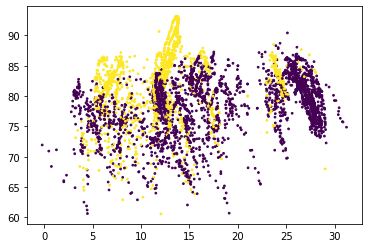

In [2]:
import matplotlib.pyplot as plt
dataframe = pd.DataFrame(data)
plt.scatter(dataframe['tem_in'], dataframe['hum_in'],   c = dataframe['cond'], s = 3)

In [3]:
import math

dewpoint = []
b = 17.62
c = 243.12
for i in range(len(data.index)):
    gamma = (b * data['tem_in'][i] /(c + data['tem_in'][i])) + math.log(data['hum_in'][i] / 100.0)
    dewpoint.append((c * gamma) / (b - gamma))
             
df = pd.DataFrame(dewpoint)
data["dewpoint"] = dewpoint

data.describe()

,tem_in,hum_in,tem_coil,tem_out,hum_out,cond,loc,tem_diff,dewpoint
count,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000
mean,16.207415,79.541930,13.738583,15.116829,81.868742,0.345022,2.242521,2.468833,12.638504
std,7.488206,5.299582,8.061115,7.841386,10.217830,0.475434,0.787931,1.182159,7.500048
min,-0.200000,60.590000,-3.260000,-2.940000,36.510000,0.000000,1.000000,-0.600000,-4.651696
25%,11.470000,76.220000,8.390000,9.790000,77.117500,0.000000,2.000000,1.660000,7.722785
50%,14.000000,80.040000,10.750000,13.750000,85.010000,0.000000,2.000000,2.400000,10.910351
75%,24.350000,83.030000,21.930000,23.490000,89.040000,1.000000,3.000000,3.227500,21.090298
max,31.210000,93.160000,28.720000,34.420000,95.120000,1.000000,3.000000,7.030000,26.220333


In [4]:

cl = LogisticRegression()

X = data[['tem_in','hum_in','tem_coil','tem_out','hum_out', 'dewpoint']]
y = data[['cond']]


trainX,testX,trainy,testy = train_test_split(X,y, test_size = 0.3)

print(trainX.shape)
print(trainy.shape)

(2854, 6)
(2854, 1)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
log_reg = LogisticRegression()
log_reg.fit(trainX, trainy)
 
x2 = sm.add_constant(X)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(testX)
print(y_pred)
print(list(testy))

print('정확도 :', metrics.accuracy_score(testy, y_pred))

                            OLS Regression Results                            
Dep. Variable:                   cond   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     1378.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:15:10   Log-Likelihood:                -492.42
No. Observations:                4078   AIC:                             998.8
Df Residuals:                    4071   BIC:                             1043.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1475      1.567     11.580      0.0

C:\Users\sean\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sean\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:

cl.fit(trainX,trainy)

print(testX.shape)

print(cl.score(testX,testy))

predict = cl.predict(X)


(1224, 6)
0.9918300653594772


C:\Users\sean\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sean\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


35

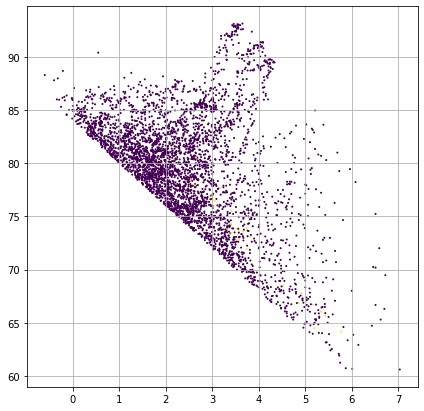

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))


correct_idx = np.where(predict == data['cond'])[0]

target_color = data['cond'].values.copy()
target_color[correct_idx] = 0


miss_idx = np.where(predict != data['cond'])[0]

target_color[miss_idx] = 3



plt.scatter(data['tem_diff'], data['hum_in'], c = target_color,s = 1)

plt.grid(b = True,which = 'both',axis = 'both')

len(miss_idx)

In [8]:
miss_list = []
for i in miss_idx:
    miss_list.append(data.iloc[i])
    
df123 = pd.DataFrame(miss_list)


print(df123['cond'].value_counts(normalize=False))
df123.describe()


1.0    29
0.0     6
Name: cond, dtype: int64


,tem_in,hum_in,tem_coil,tem_out,hum_out,cond,loc,tem_diff,dewpoint
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,10.964857,73.836571,7.387429,10.193143,74.597714,0.828571,2.285714,3.577429,6.446389
std,5.817379,4.930279,5.792647,6.878569,11.780156,0.382385,0.710072,1.001215,5.769595
min,3.930000,64.160000,-1.080000,2.190000,49.540000,0.000000,1.000000,2.140000,-1.998650
25%,6.015000,72.360000,3.405000,3.865000,69.370000,1.000000,2.000000,2.940000,2.475972
50%,10.270000,73.870000,6.740000,9.000000,76.470000,1.000000,2.000000,3.410000,5.810484
75%,14.870000,77.330000,9.640000,15.340000,83.665000,1.000000,3.000000,3.785000,8.684222
max,27.400000,81.170000,24.750000,29.600000,91.640000,1.000000,3.000000,5.770000,23.756867


In [9]:
df123

#겨울에 오분류가 많다
#결로가 안일어났는데 결로가 일어났다고 예측하는 경우가 많다.

,mea_ddhr,tem_in,hum_in,tem_coil,tem_out,hum_out,cond,loc,time_period,tem_diff,ran,dewpoint
69,2017-09-24 15:00,24.68,77.66,21.51,24.99,76.65,0.0,1,2017-09-24 15:00:00,3.17,True,20.513107
103,2017-12-03 14:00,10.27,73.87,6.74,8.50,76.89,1.0,1,2017-12-03 14:00:00,3.53,True,5.810484
108,2017-12-10 12:00,7.95,76.01,4.91,7.83,75.03,1.0,1,2017-12-10 12:00:00,3.04,True,3.977438
139,2018-02-14 11:00,7.56,68.44,3.04,11.16,50.37,1.0,1,2018-02-14 11:00:00,4.52,True,2.117936
169,2018-03-13 22:00,14.64,73.08,10.82,13.51,74.30,1.0,1,2018-03-13 22:00:00,3.82,True,9.865995
1001,2017-04-06 1:00,15.16,81.17,12.92,12.08,90.69,1.0,2,2017-04-06 01:00:00,2.24,True,11.951578
1051,2017-11-26 2:00,10.24,73.60,6.67,8.93,76.47,1.0,2,2017-11-26 02:00:00,3.57,True,5.728585
1080,2017-12-10 10:00,6.31,78.51,3.77,4.78,83.91,1.0,2,2017-12-10 10:00:00,2.54,True,2.844942
1096,2017-12-23 21:00,7.28,76.65,4.38,3.19,86.11,1.0,2,2017-12-23 21:00:00,2.90,True,3.447384
1199,2018-03-27 15:00,14.37,67.77,9.45,18.58,49.54,0.0,2,2018-03-27 15:00:00,4.92,True,8.486157


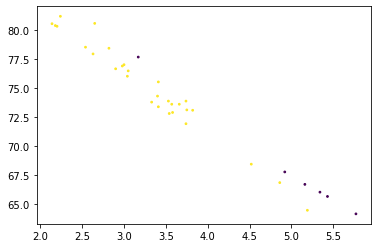

In [13]:
plt.scatter(df123['tem_diff'], df123['hum_in'],   c = df123['cond'], s = 3)